In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [94]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

In [95]:
print mesh.variables.keys() 

[u'nav_lon', u'nav_lat', u'nav_lev', u'time_counter', u'tmask', u'umask', u'vmask', u'fmask', u'tmaskutil', u'umaskutil', u'vmaskutil', u'fmaskutil', u'glamt', u'glamu', u'glamv', u'glamf', u'gphit', u'gphiu', u'gphiv', u'gphif', u'e1t', u'e1u', u'e1v', u'e1f', u'e2t', u'e2u', u'e2v', u'e2f', u'ff', u'mbathy', u'e3t', u'e3u', u'e3v', u'e3w', u'gdept', u'gdepu', u'gdepv', u'gdepw', u'gdept_0', u'gdepw_0', u'e3t_0', u'e3w_0']


In [96]:
gdepw=mesh.variables['gdepw'][:]
mbathy=mesh.variables['mbathy'][:]
print mbathy.shape
print gdepw.shape

(1, 800, 544)
(1, 50, 800, 544)


found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/addbbc/ANHA-bbc_1m_20020101_20020702_ptrc_T.nc']
(6, 800, 544)
7


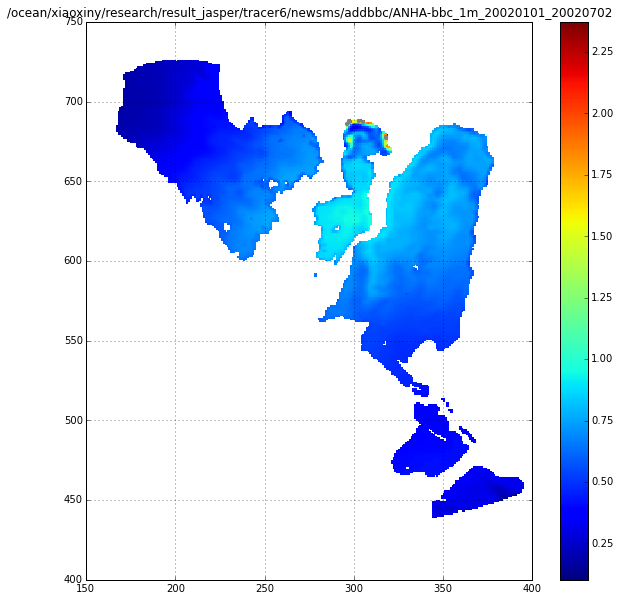

In [97]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/addbbc/*ANHA*bbc*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

fig = plt.figure(figsize=(10,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_8'][:,42,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    print TR_7.shape

    ii=[]
    jj=[]
    timestep=-1
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>2:
                ii.append(i)
                jj.append(j)
    
    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    print len(jj)
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    plt.xlim([150,400])
    plt.ylim([400,750])
plt.show()

In [98]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']

import matplotlib.cm as cm
def vetical(data,dep,string,jj,ii,ylim='False'):
    
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*50)
        plt.plot(data[i,:,ii,jj],dep,color=cc,linewidth=1,label='T:%s'%i)
        plt.legend(loc=0)

    for k in range (len(dep)):
        plt.axhline(dep[k],c="grey",linestyle='--',linewidth=0.5,alpha=0.5)
    plt.axhline(dep[mbathy[0,ii,jj]],c="blue",linestyle='--',linewidth=2,alpha=0.5)
    plt.axhline(bathy[ii,jj],c="grey",linewidth=2,alpha=0.7)
    plt.axhline(gdepw[0,mbathy[0,ii,jj],ii,jj],c="red",linestyle='--',linewidth=2,alpha=0.5)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    
    if ylim=='True':
        dmin=bathy[ii,jj]-1000
        dmax=bathy[ii,jj]+500
    plt.ylim([dmin,dmax])
              
    print ('deepest:%s m'%(bathy[ii,jj]))
    print gdepw[0,mbathy[0,ii,jj],ii,jj]

In [99]:
ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

In [100]:
print ii

[677, 678, 686, 687, 687, 688, 688]


deepest:2748.99 m
2748.99
deepest:2748.99 m
2748.99
deepest:2748.99 m
2748.99
deepest:2748.99 m
2748.99


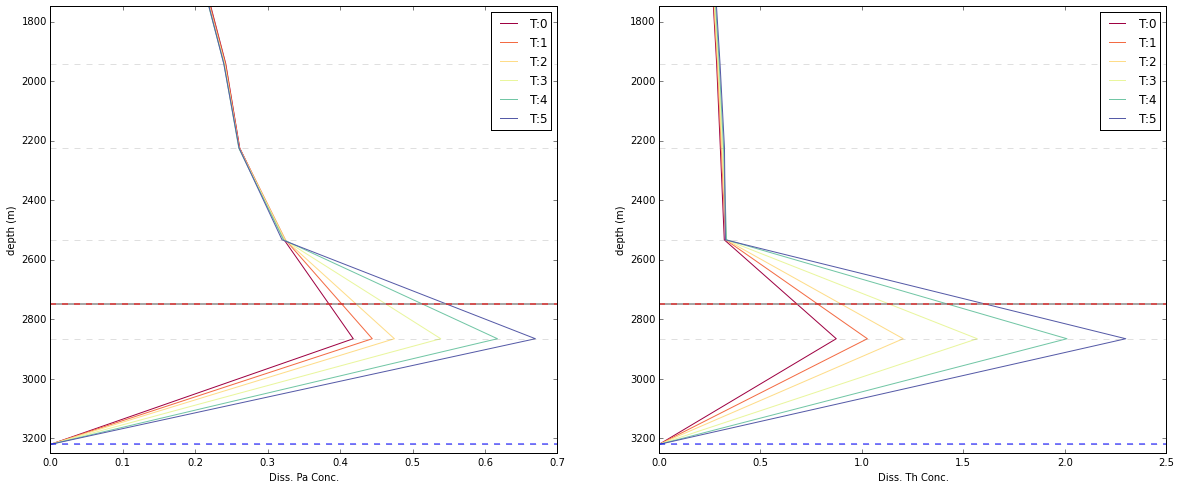

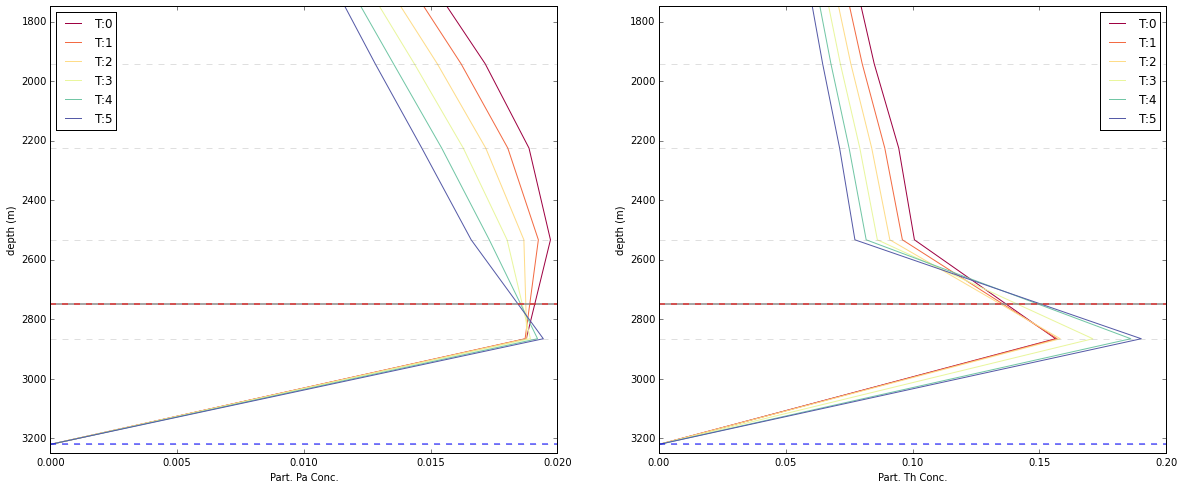

deepest:2728.74 m
2728.74
deepest:2728.74 m
2728.74
deepest:2728.74 m
2728.74
deepest:2728.74 m
2728.74


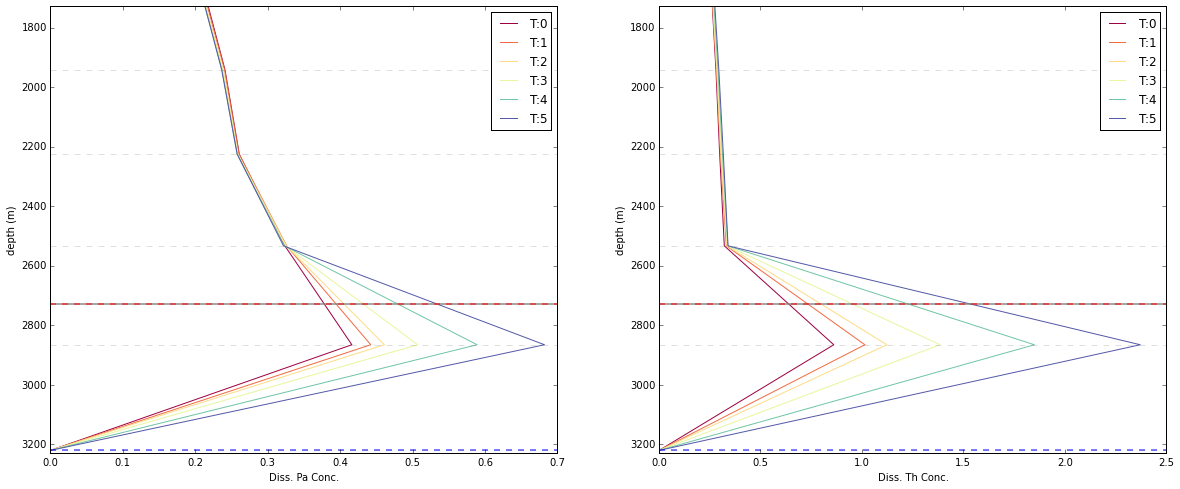

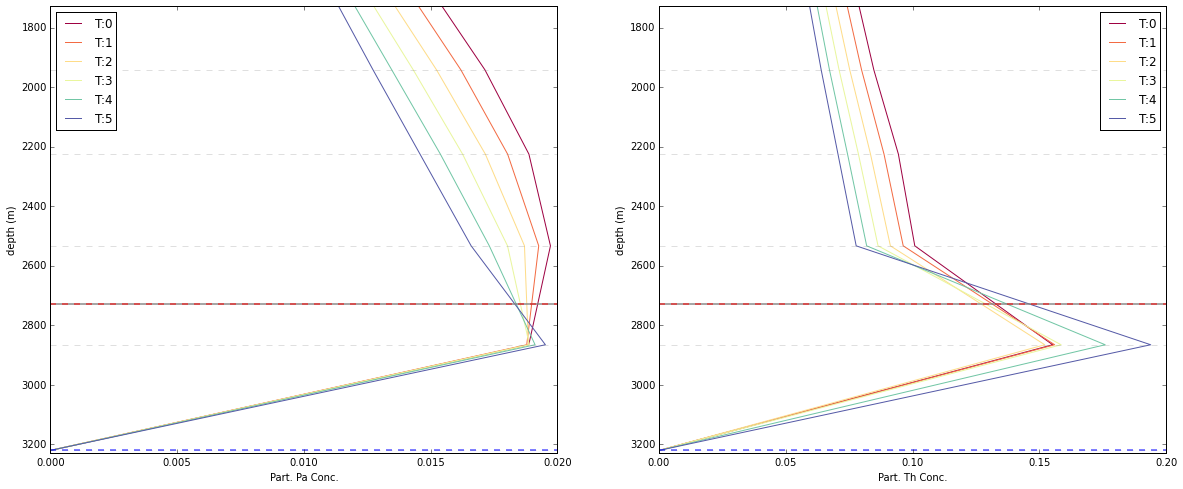

deepest:2723.57 m
2723.57
deepest:2723.57 m
2723.57
deepest:2723.57 m
2723.57
deepest:2723.57 m
2723.57


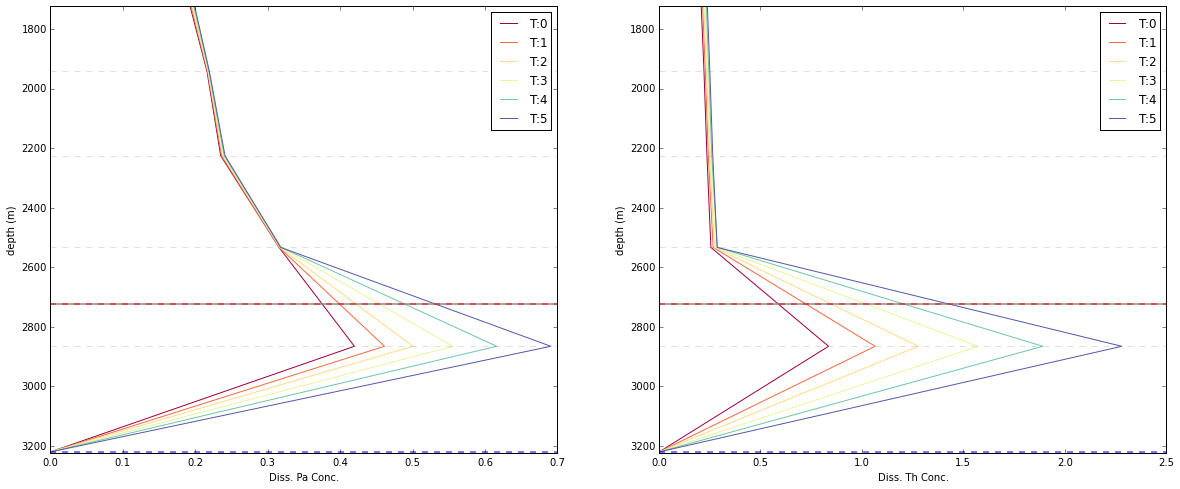

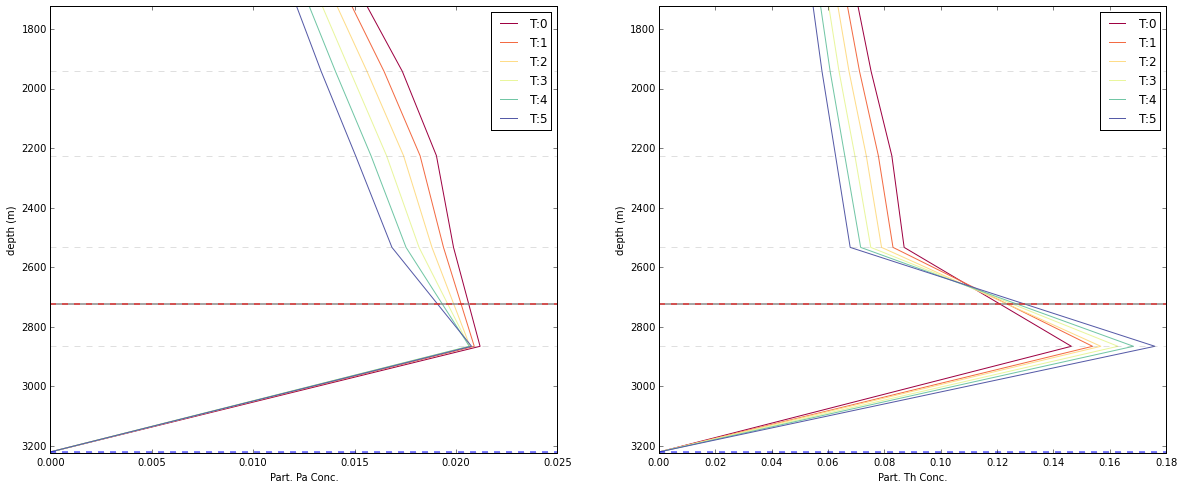

deepest:2729.56 m
2729.56
deepest:2729.56 m
2729.56
deepest:2729.56 m
2729.56
deepest:2729.56 m
2729.56


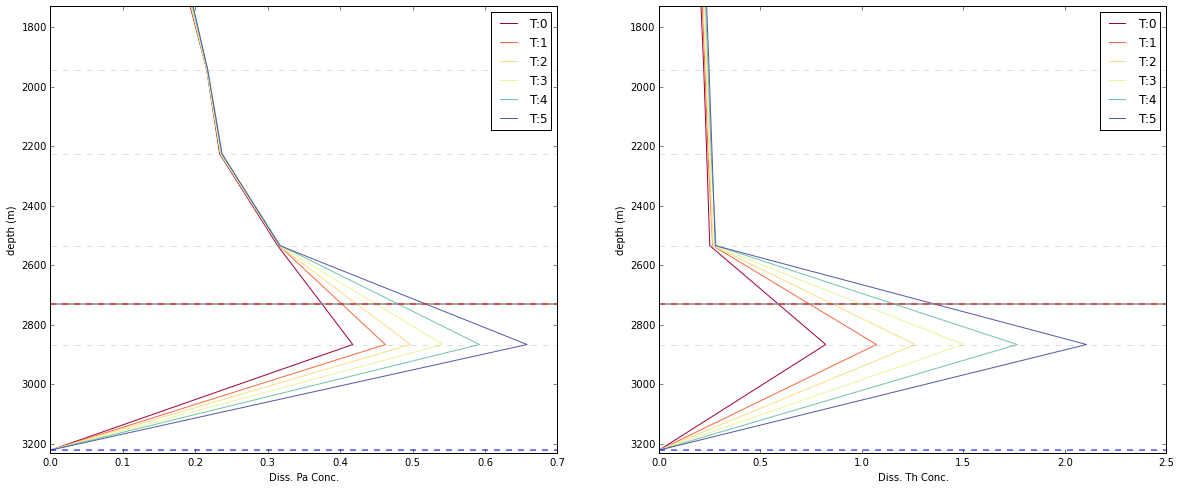

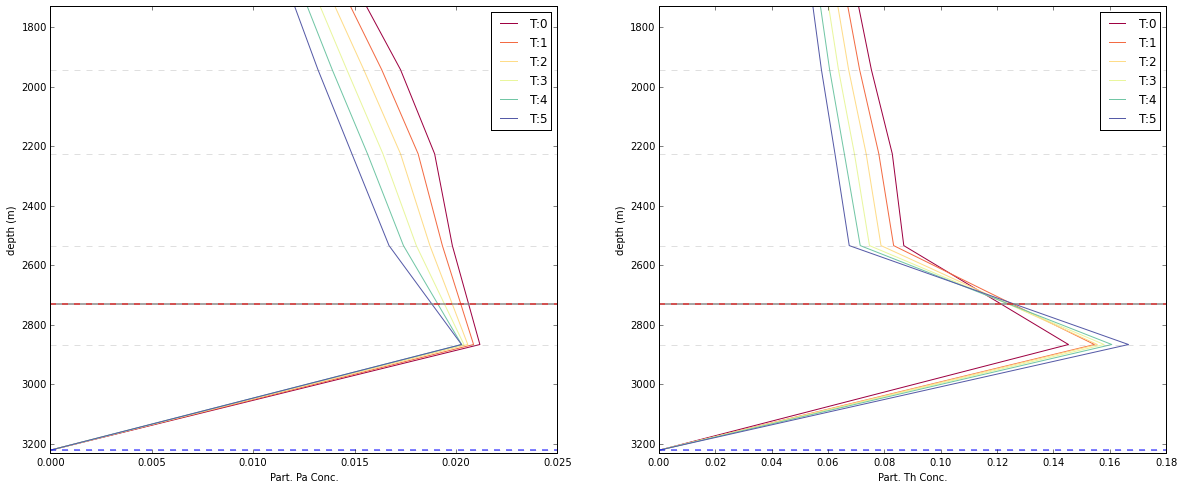

deepest:2729.58 m
2729.58
deepest:2729.58 m
2729.58
deepest:2729.58 m
2729.58
deepest:2729.58 m
2729.58


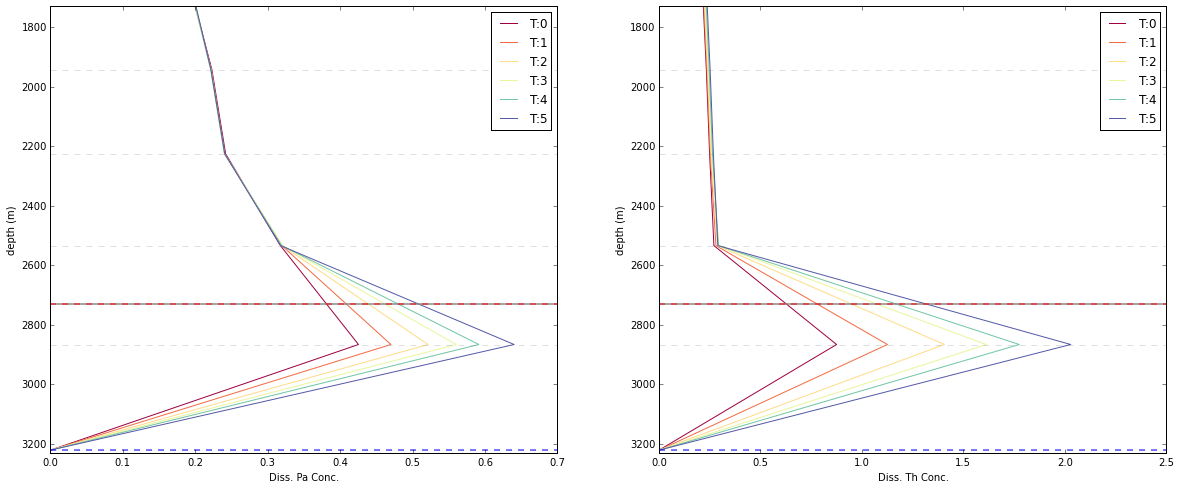

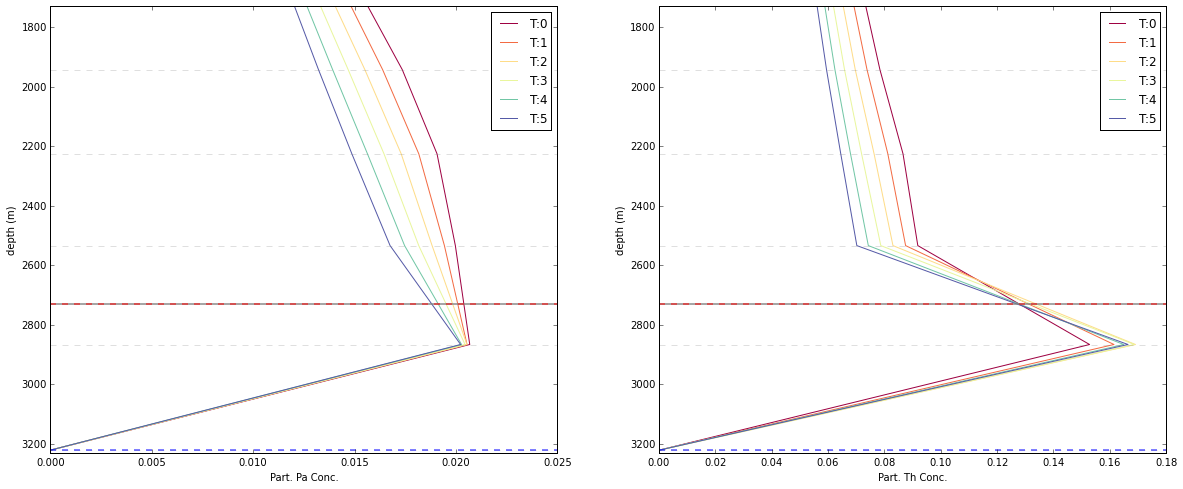

deepest:2722.0 m
2722.0
deepest:2722.0 m
2722.0
deepest:2722.0 m
2722.0
deepest:2722.0 m
2722.0


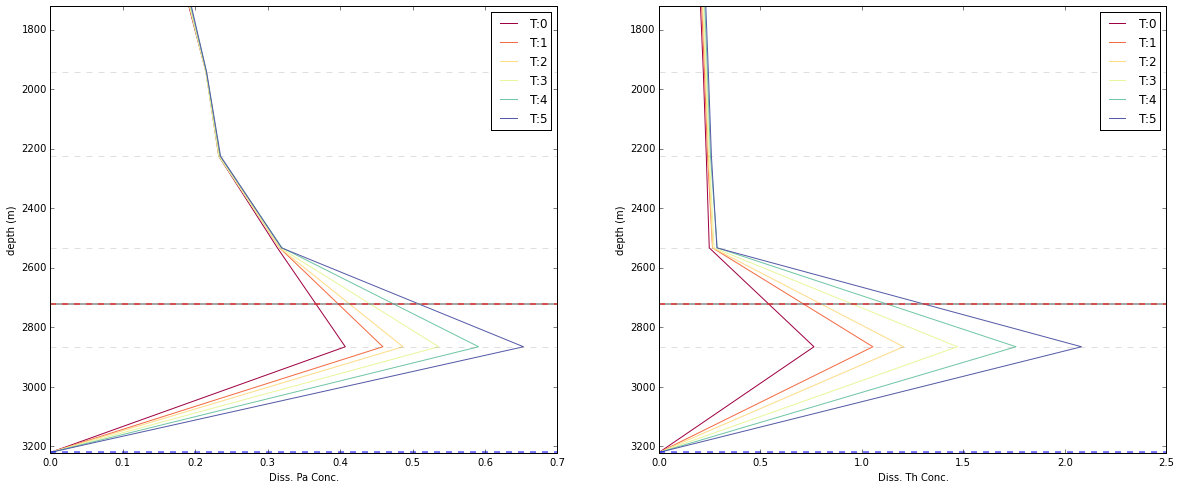

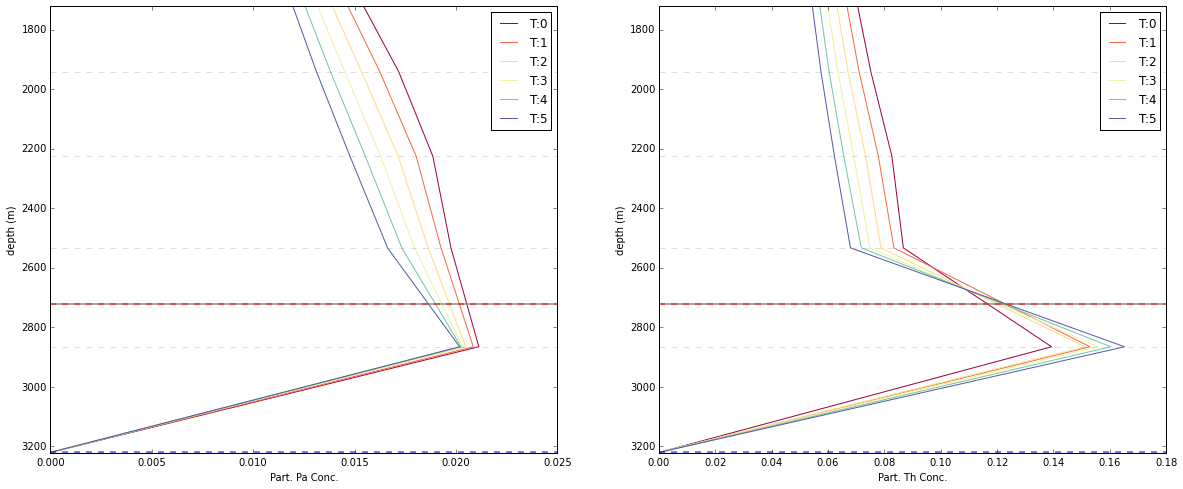

deepest:2723.09 m
2723.09
deepest:2723.09 m
2723.09
deepest:2723.09 m
2723.09
deepest:2723.09 m
2723.09


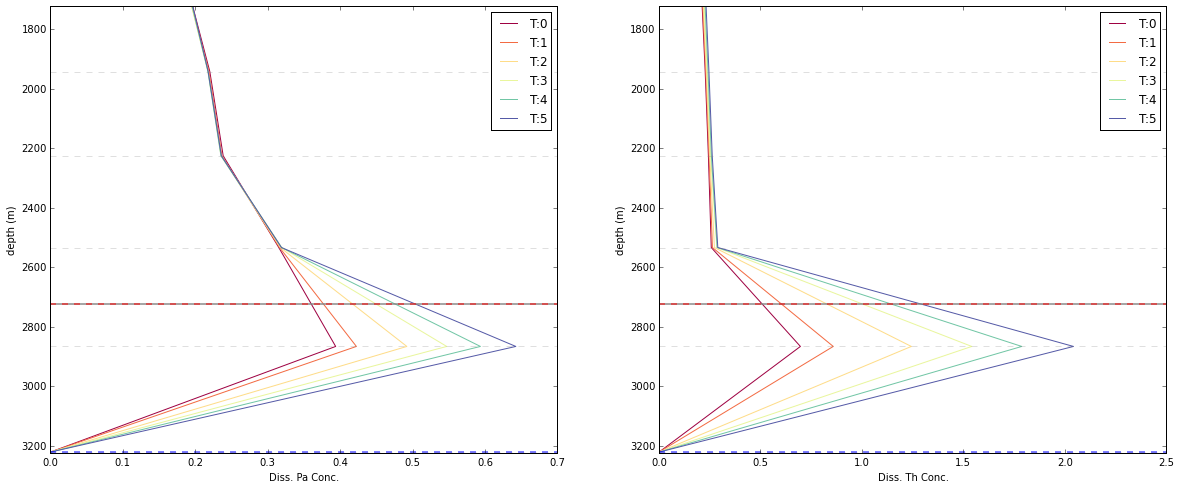

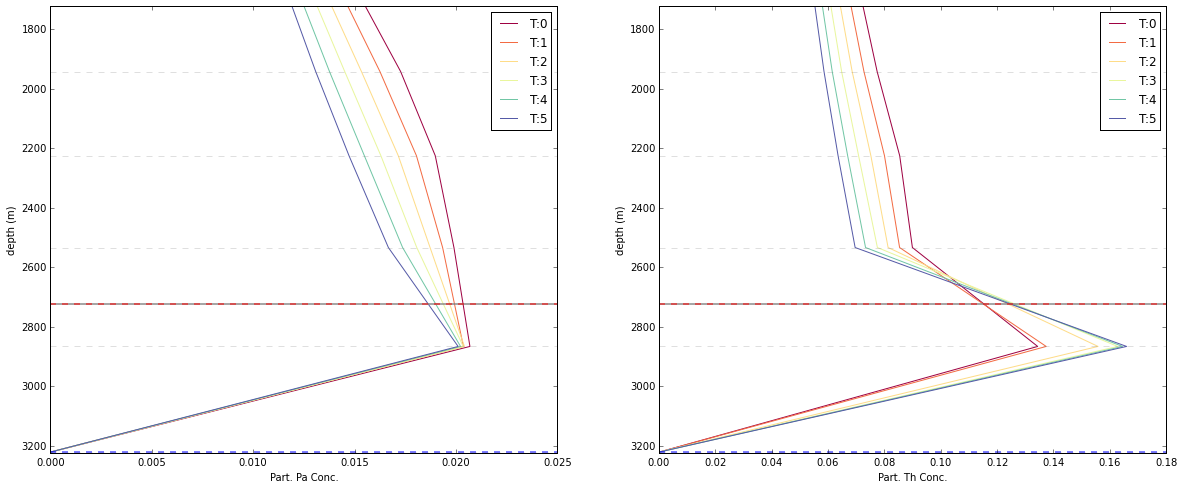

In [101]:
for i in range (0,len(ii)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis() 
    plt.subplot(122);vetical(TR_8,dep,'Diss. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_9,dep,'Part. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()
    plt.subplot(122);vetical(TR_10,dep,'Part. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    plt.show()

deepest:2876.61 m
2876.61
deepest:2876.61 m
2876.61
deepest:2876.61 m
2876.61
deepest:2876.61 m
2876.61


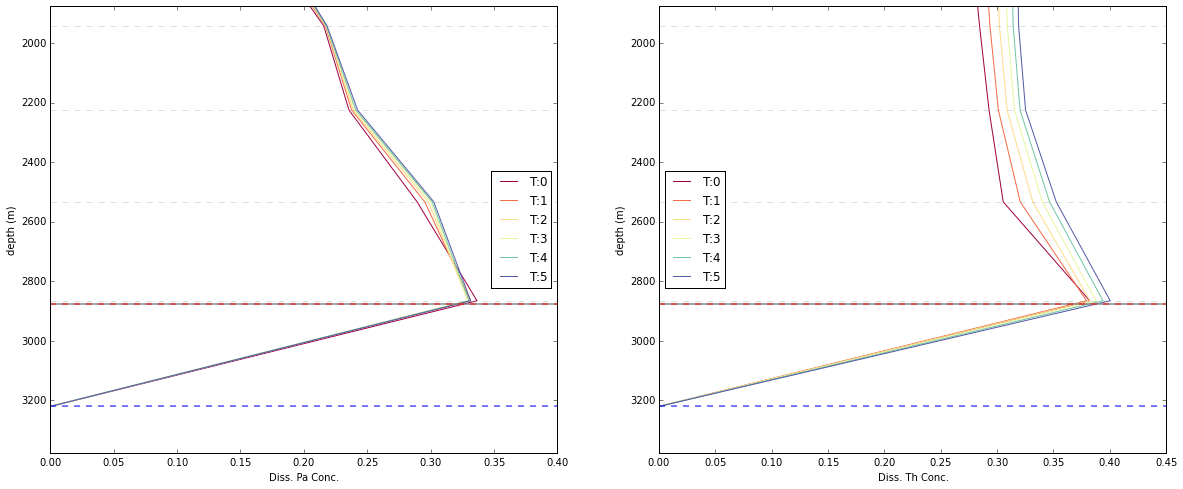

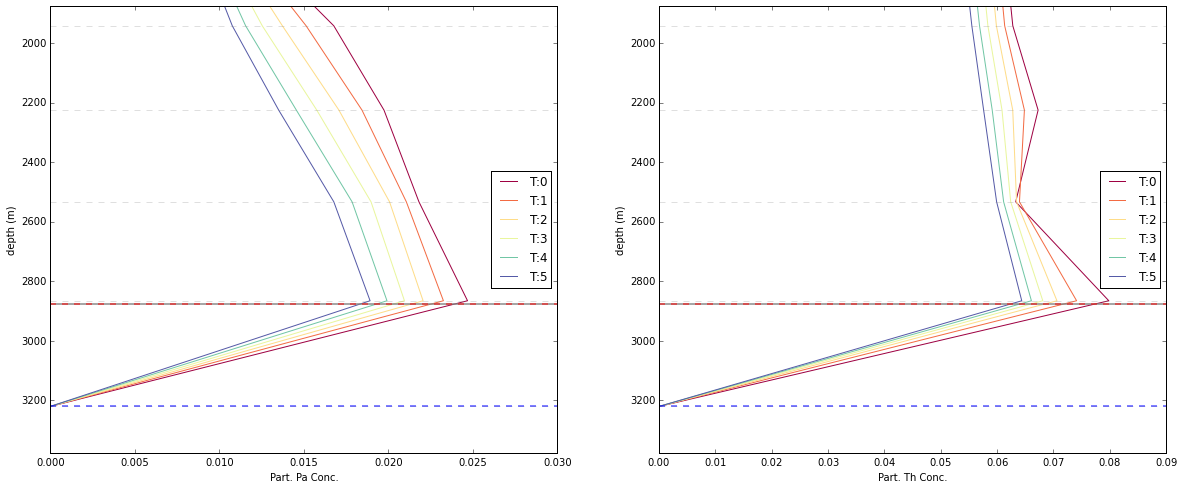

deepest:3724.28 m
3724.28
deepest:3724.28 m
3724.28
deepest:3724.28 m
3724.28
deepest:3724.28 m
3724.28


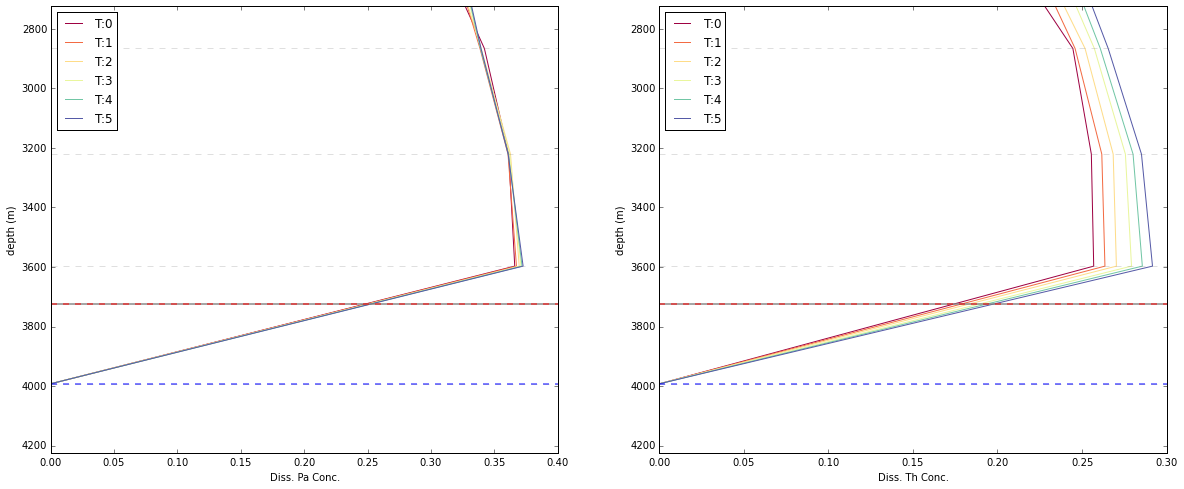

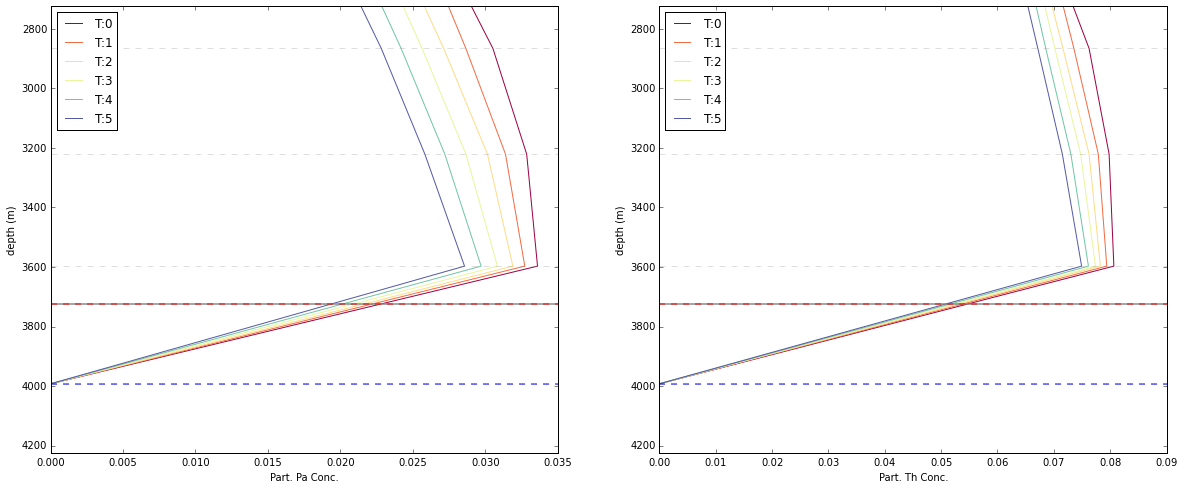

deepest:3750.12 m
3750.12
deepest:3750.12 m
3750.12
deepest:3750.12 m
3750.12
deepest:3750.12 m
3750.12


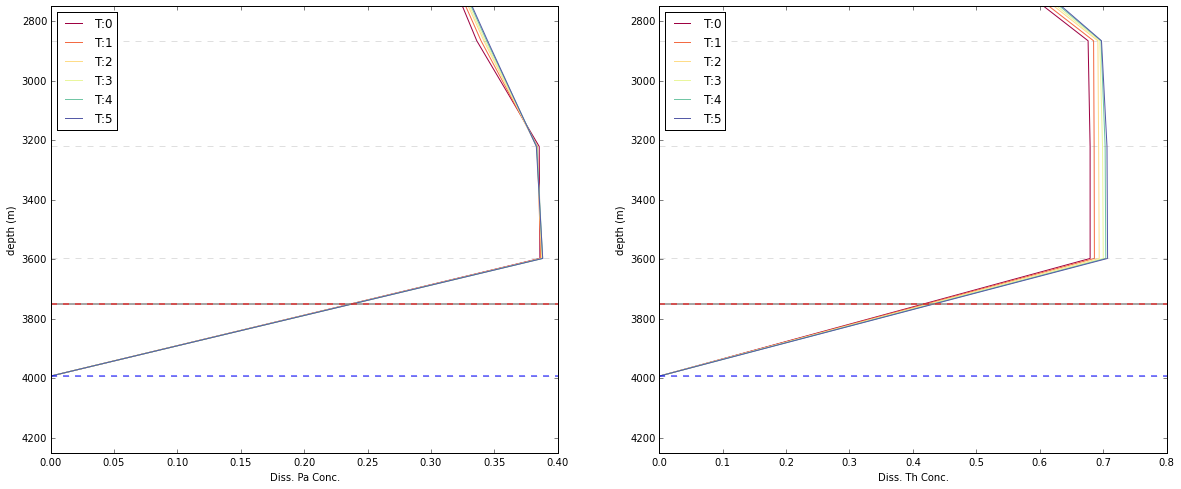

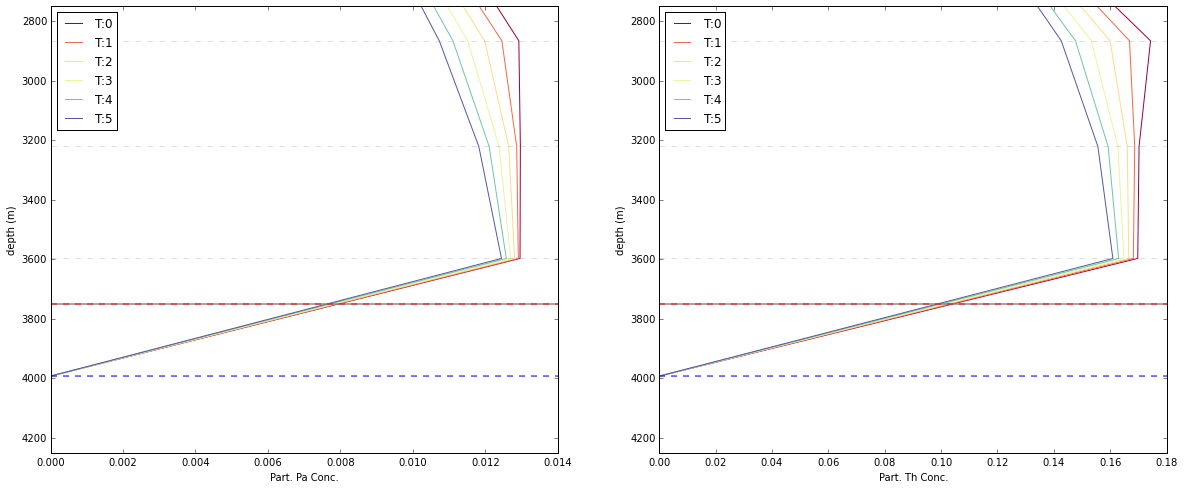

deepest:506.603 m
495.718
deepest:506.603 m
495.718
deepest:506.603 m
495.718
deepest:506.603 m
495.718


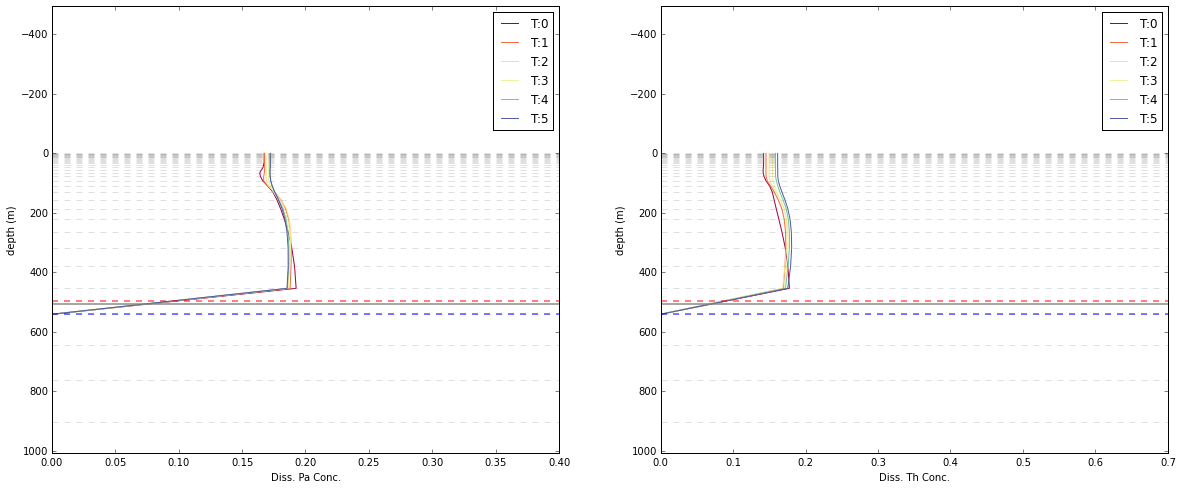

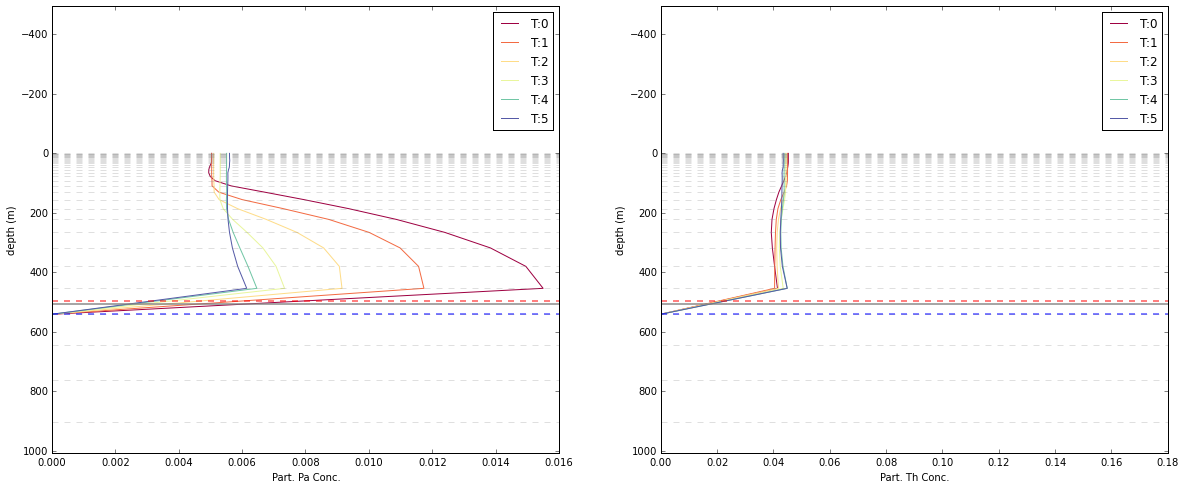

In [87]:
ii=[650,700,600,600]
jj=[200,200,350,400]
for i in range (len(ii)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis() 
    plt.subplot(122);vetical(TR_8,dep,'Diss. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_9,dep,'Part. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()
    plt.subplot(122);vetical(TR_10,dep,'Part. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    plt.show()

* bad points from previous model output

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/1try_oldbathy_1m_20020101_20021231_ptrc_T.nc']
(12, 800, 544)
3


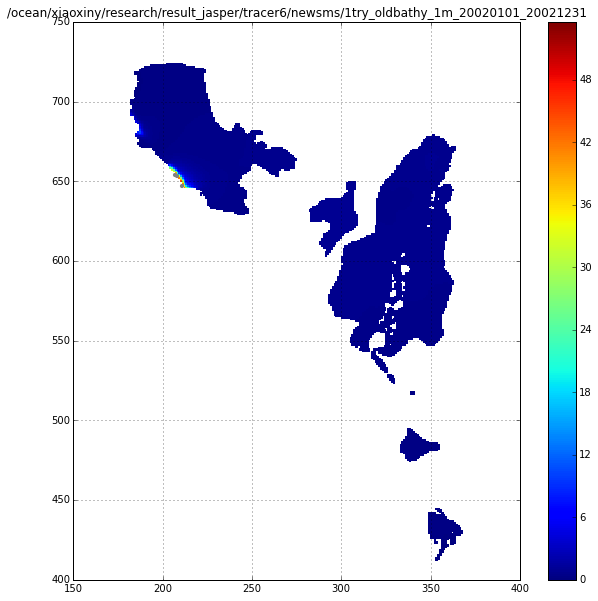

In [108]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/*old*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

fig = plt.figure(figsize=(10,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_8'][:,44,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    print TR_7.shape

    ii=[]
    jj=[]
    timestep=-1
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>48:
                ii.append(i)
                jj.append(j)
    
    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    print len(jj)
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    plt.xlim([150,400])
    plt.ylim([400,750])
plt.show()

In [112]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/addbbc/*ANHA*bbc*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))


ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]
print ii

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/addbbc/ANHA-bbc_1m_20020101_20020702_ptrc_T.nc']
[647, 653, 654]


deepest:3434.35 m
3434.35
deepest:3434.35 m
3434.35
deepest:3434.35 m
3434.35
deepest:3434.35 m
3434.35


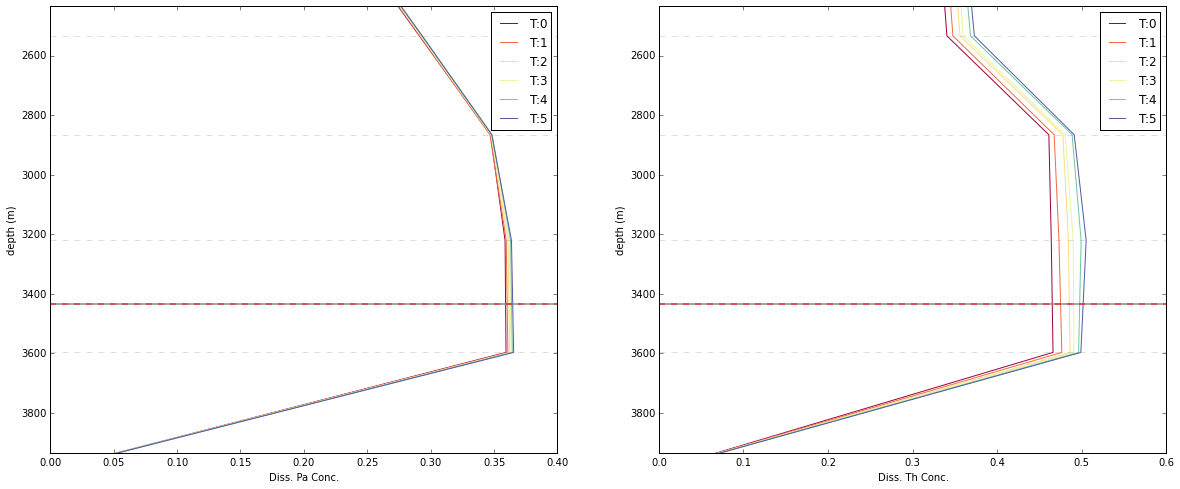

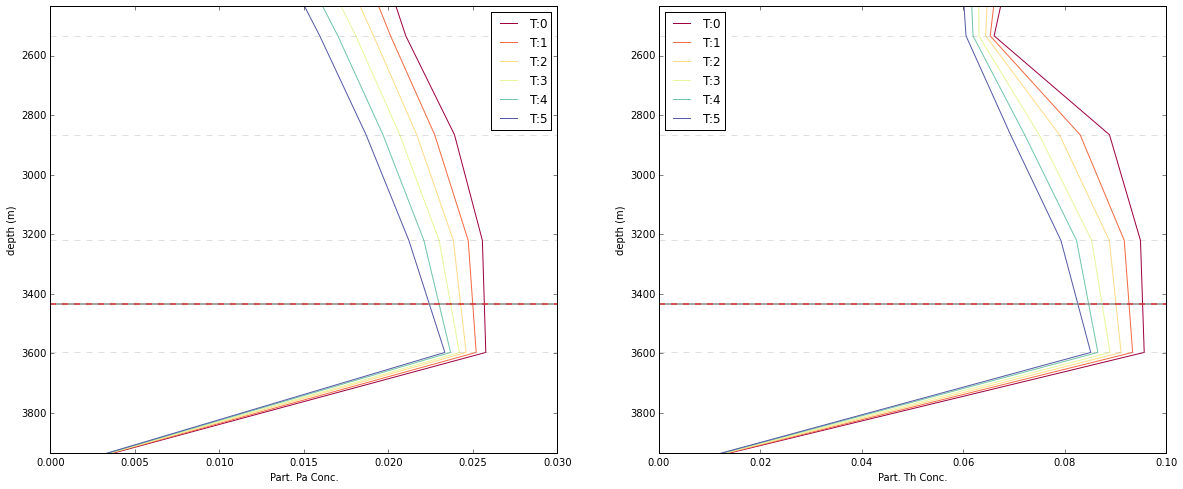

deepest:3436.06 m
3436.06
deepest:3436.06 m
3436.06
deepest:3436.06 m
3436.06
deepest:3436.06 m
3436.06


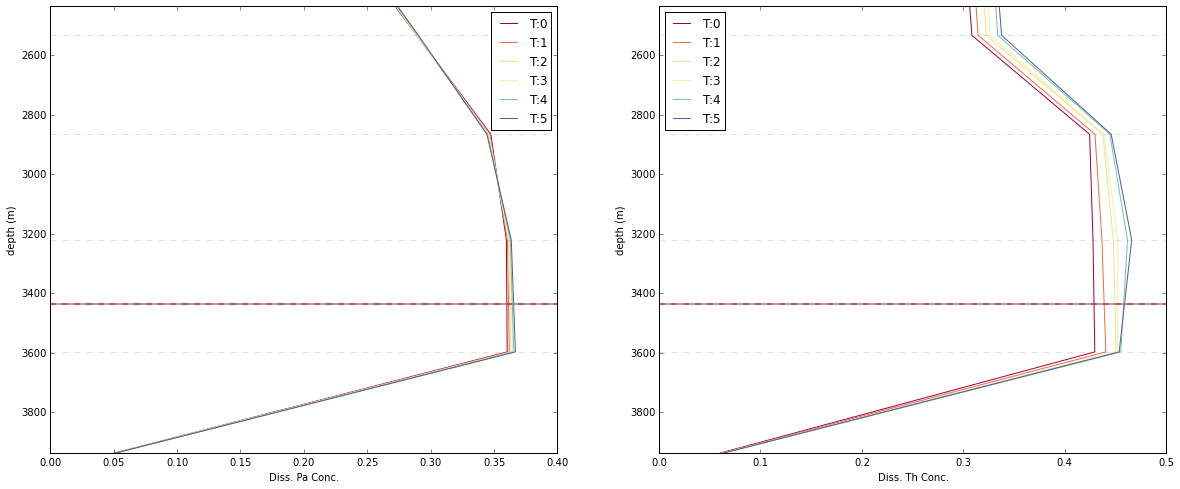

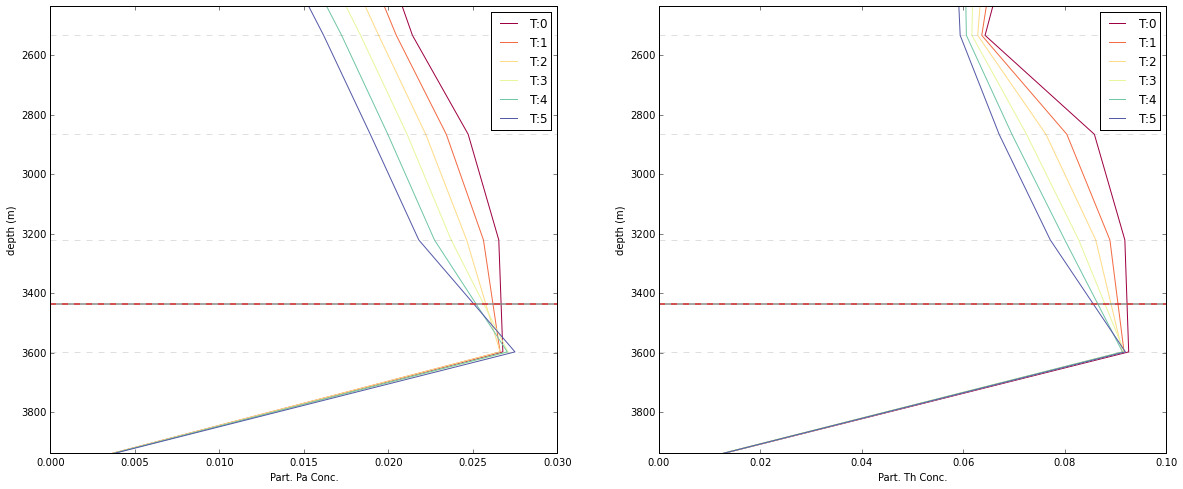

deepest:3431.96 m
3431.96
deepest:3431.96 m
3431.96
deepest:3431.96 m
3431.96
deepest:3431.96 m
3431.96


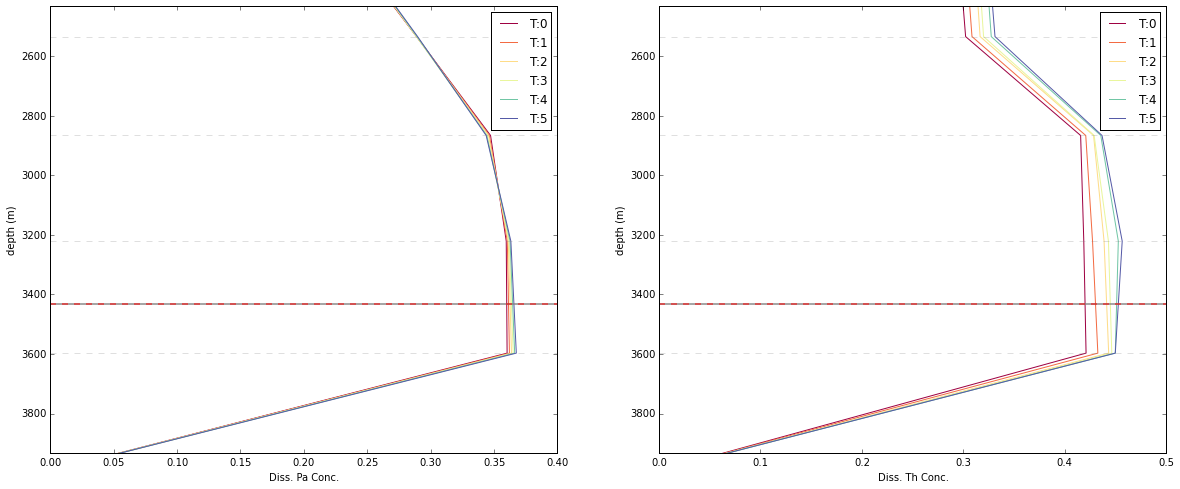

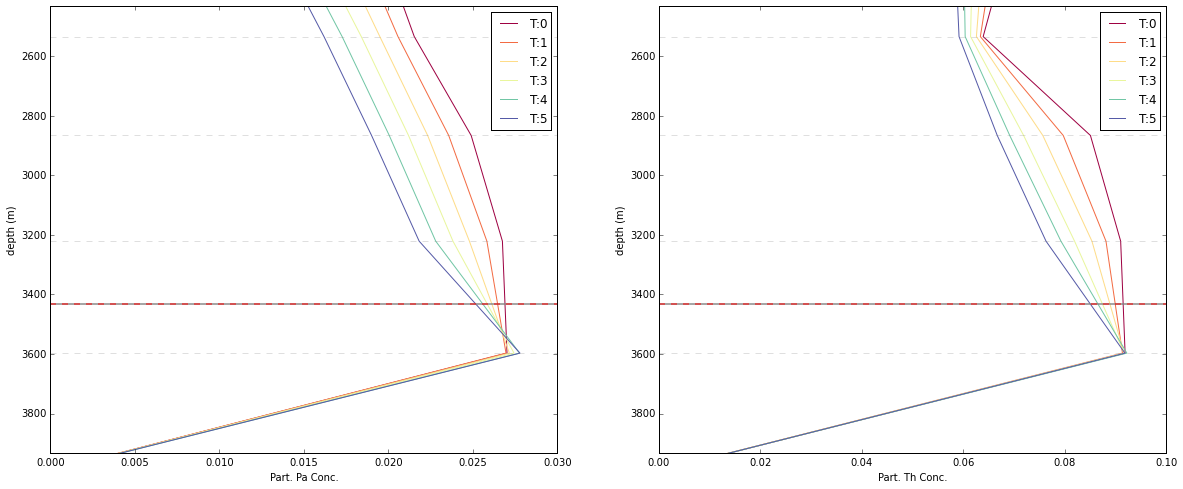

In [113]:
for i in range (0,len(ii)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis() 
    plt.subplot(122);vetical(TR_8,dep,'Diss. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_9,dep,'Part. Pa',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()
    plt.subplot(122);vetical(TR_10,dep,'Part. Th',jj=jj[i],ii=ii[i],ylim='True');plt.gca().invert_yaxis()

    plt.show()